In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


Matplotlib created a temporary cache directory at C:\Users\Hp\AppData\Local\Temp\matplotlib-uhihw44x because the default path (C:\Users\Hp\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
def f(x,y):
    return (2-x)**2 + 10*((y - x**2)**2)

In [3]:
def df_dx(x,y) :
    return -2*(2-x) - 40*(y-x**2)*x

def df_dy(x,y) :
    return 20*(y-x**2)

In [4]:
def L2Norm(x,y) :
    grad_x = df_dx(x,y);
    grad_y = df_dy(x,y);
    return np.sqrt(grad_x**2 + grad_y**2)

def tolerance(p) :
    return 10 ** (-1*p)

In [5]:
def gradient_descent(x_start , y_start , learning_rate) :
    tablelist=[]
    tau_values = []
    iteration_counts = []

    for i in range (12) :

        x = x_start
        y = y_start

        history =[]
        count = 0
        norm = L2Norm(x,y)
        TLevel = tolerance(i+1)

        while(norm > TLevel) :
            grad_x = df_dx(x,y)
            grad_y = df_dy(x,y)

            x = x - learning_rate*grad_x
            y = y - learning_rate*grad_y

            norm = L2Norm(x,y)
            count = count + 1;

            history.append((x,y,f(x,y)))
        
        tau_values.append(10**(-1*(i+1)))
        iteration_counts.append(count)

        tablelist.append((10**(-1*(i+1)) , count , x , y , f(x,y) ))
        table_array = np.array(tablelist)

    print("Tolerance         Iterations      x       y       f(x,y) ")
    print(table_array)

    plt.figure(figsize=(8, 6))
    plt.plot(tau_values, iteration_counts, marker='o', linestyle='-', color='blue', label='Iterations vs Tolerance')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Tolerance (τ)')
    plt.ylabel('Number of Iterations')
    plt.title('Iterations vs Tolerance (τ)')
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend()
    plt.show()


    return x,y,f(x,y),history 



Tolerance         Iterations      x       y       f(x,y) 
[[1.00000000e-01 1.03260000e+04 1.81203106e+00 3.27863423e+00
  3.55648718e-02]
 [1.00000000e-02 2.79960000e+04 1.97958254e+00 3.91826209e+00
  4.19224313e-04]
 [1.00000000e-03 4.74550000e+04 1.99794048e+00 3.99171763e+00
  4.26517878e-06]
 [1.00000000e-04 6.71120000e+04 1.99979387e+00 3.99917066e+00
  4.27255886e-08]
 [1.00000000e-05 8.67890000e+04 1.99997939e+00 3.99991706e+00
  4.27329038e-10]
 [1.00000000e-06 1.06468000e+05 1.99999794e+00 3.99999171e+00
  4.27335812e-12]
 [1.00000000e-07 1.26148000e+05 1.99999979e+00 3.99999917e+00
  4.27255960e-14]
 [1.00000000e-08 1.45827000e+05 1.99999998e+00 3.99999992e+00
  4.27277377e-16]
 [1.00000000e-09 1.65506000e+05 2.00000000e+00 3.99999999e+00
  4.27300846e-18]
 [1.00000000e-10 1.85186000e+05 2.00000000e+00 4.00000000e+00
  4.27305439e-20]
 [1.00000000e-11 2.04871000e+05 2.00000000e+00 4.00000000e+00
  4.27277174e-22]
 [1.00000000e-12 2.24778000e+05 2.00000000e+00 4.00000000e+00


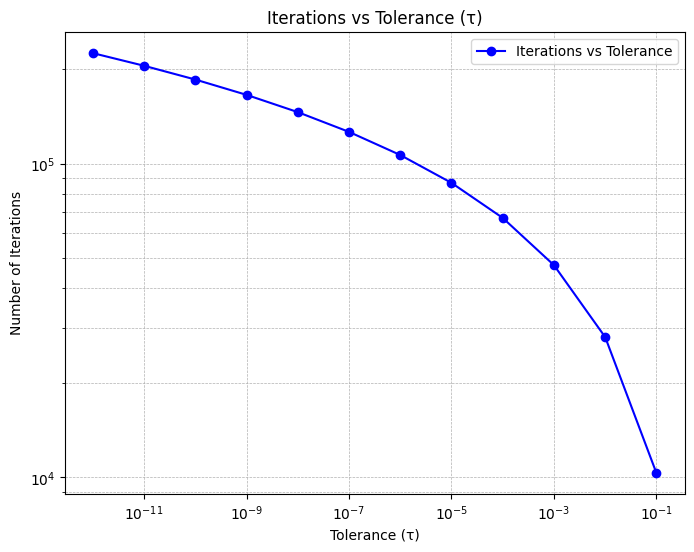

In [6]:
x_range = np.arange(-5,5,0.1)
y_range = np.arange(-5,5,0.1)

X,Y = np.meshgrid(x_range,y_range)

Z = f(X,Y)

x_start , y_start = -1.5 , 1.5
learning_rate = 0.001

x_dash ,y_dash ,f_dash ,history = gradient_descent(x_start , y_start , learning_rate)


In [7]:
print(f_dash)
print("Minimiser in x = ", x_dash)
print("Minimiser in y = ", y_dash)

4.205105934979458e-24
Minimiser in x =  1.9999999999979552
Minimiser in y =  3.999999999991772


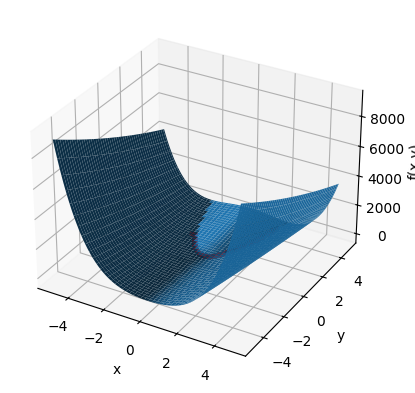

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z)
ax.scatter(*zip(*history), c='r', marker='.')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.show()
